# 📊 Feature Engineering

Este notebook consume la informaciòn generada en el notebook data-collection.

## Contenido
1. Características Técnicas
2. Características Estadísticas
3. Características de Sentimiento
4. Almacenamiento de Datos

## Dependencias
- pandas
- numpy
- matplotlib
- seaborn
- plotly

In [26]:
 #Feature Engineering Notebook for USD/MXN Prediction

# Importación de librerías
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime, timedelta

# Configuración de visualización
sns.set_theme(style="whitegrid")  # Esto reemplaza plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', None)

# Verificar estructura del proyecto
notebook_dir = os.getcwd()
print("Directorio actual:", notebook_dir)

# Verificar si estamos en notebooks/ y ajustar rutas
if os.path.basename(notebook_dir) == 'notebooks':
    project_dir = os.path.dirname(notebook_dir)
    data_path = os.path.join(notebook_dir, 'data', 'processed')
else:
    project_dir = notebook_dir
    data_path = os.path.join(project_dir, 'notebooks', 'data', 'processed')

print("Directorio del proyecto:", project_dir)

# Verificar existencia de directorios
src_path = os.path.join(project_dir, 'src')
print("\nVerificando estructura del proyecto:")
print(f"¿Existe src/?: {os.path.exists(src_path)}")
print(f"¿Existe data/processed/?: {os.path.exists(data_path)}")

if os.path.exists(data_path):
    print("\nContenido de data/processed/:")
    print(os.listdir(data_path))

# Agregar al path solo si existe
if os.path.exists(project_dir):
    sys.path.insert(0, project_dir)
    print("\nPath actualizado:", project_dir)

# Intentar importar nuestros módulos
try:
    from src.utils.feature_engineering import FeatureEngineer
    from src.data.collectors import MarketDataCollector
    from src.data.processors import EnhancedMarketProcessor
    print("\nMódulos importados correctamente")
except ImportError as e:
    print("\nError importando módulos:", str(e))


Directorio actual: /Users/mayel/repos/banco-base-proyecto-test/notebooks
Directorio del proyecto: /Users/mayel/repos/banco-base-proyecto-test

Verificando estructura del proyecto:
¿Existe src/?: True
¿Existe data/processed/?: True

Contenido de data/processed/:
['stocks_2024-11-11.csv', 'stocks_2024-11-10.csv', 'stocks_2024-11-12.csv', 'fx_rates_2024-11-12.csv', 'fx_rates_2024-11-10.csv', 'fx_rates_2024-11-11.csv', 'correlation_matrix_2024-11-11.csv', 'correlation_matrix_2024-11-10.csv', 'correlation_matrix_2024-11-12.csv', 'news_2024-11-12.csv', 'news_2024-11-11.csv', 'news_2024-11-10.csv']

Path actualizado: /Users/mayel/repos/banco-base-proyecto-test

Módulos importados correctamente


In [27]:
# Inicializar nuestras clases
collector = MarketDataCollector()
processor = EnhancedMarketProcessor()
fe = FeatureEngineer()

In [28]:
# Definir período de análisis
end_date = datetime.now()
start_date = end_date - timedelta(days=365)  # 1 año de datos
end_date_str = end_date.strftime('%Y-%m-%d')
start_date_str = start_date.strftime('%Y-%m-%d')
print(f"\nPeríodo de análisis: {start_date_str} a {end_date_str}")

# Cargar datos procesados
try:
    # Listar archivos en el directorio de datos procesados
    available_files = os.listdir(data_path)
    print("\nArchivos disponibles:")
    for file in available_files:
        print(f"- {file}")
    
    # Cargar cada conjunto de datos
    fx_files = [f for f in available_files if f.startswith('fx_rates_')]
    stocks_files = [f for f in available_files if f.startswith('stocks_')]
    news_files = [f for f in available_files if f.startswith('news_')]
    
    # Cargar datos
    data = {}
    
    if fx_files:
        latest_fx = max(fx_files)
        data['fx_rates'] = pd.read_csv(os.path.join(data_path, latest_fx), 
                                     index_col=0, 
                                     parse_dates=True)
        print(f"\nDatos de tipo de cambio cargados de: {latest_fx}")
    
    if stocks_files:
        latest_stocks = max(stocks_files)
        data['stocks'] = pd.read_csv(os.path.join(data_path, latest_stocks), 
                                   index_col=0, 
                                   parse_dates=True)
        print(f"Datos de acciones cargados de: {latest_stocks}")
    
    if news_files:
        latest_news = max(news_files)
        data['news'] = pd.read_csv(os.path.join(data_path, latest_news), 
                                 index_col=0, 
                                 parse_dates=True)
        print(f"Datos de noticias cargados de: {latest_news}")

except Exception as e:
    print(f"\nError cargando los datos: {str(e)}")
    raise

# Crear directorio para guardar features si no existe
output_dir = os.path.join(data_path, 'features')
os.makedirs(output_dir, exist_ok=True)


Período de análisis: 2023-11-13 a 2024-11-12

Archivos disponibles:
- stocks_2024-11-11.csv
- stocks_2024-11-10.csv
- stocks_2024-11-12.csv
- fx_rates_2024-11-12.csv
- fx_rates_2024-11-10.csv
- fx_rates_2024-11-11.csv
- correlation_matrix_2024-11-11.csv
- correlation_matrix_2024-11-10.csv
- correlation_matrix_2024-11-12.csv
- news_2024-11-12.csv
- news_2024-11-11.csv
- news_2024-11-10.csv

Datos de tipo de cambio cargados de: fx_rates_2024-11-12.csv
Datos de acciones cargados de: stocks_2024-11-12.csv
Datos de noticias cargados de: news_2024-11-12.csv


In [30]:
# 1. Características Técnicas
try:
    print("\nCalculando indicadores técnicos...")
    
    # Verificar si tenemos datos de tipo de cambio
    if 'fx_rates' not in data:
        raise KeyError("No se encontraron datos de tipo de cambio (fx_rates)")
    
    # Verificar las columnas disponibles
    print("\nColumnas disponibles en los datos de tipo de cambio:")
    print(data['fx_rates'].columns.tolist())
    
    # Calcular indicadores técnicos
    df_technical = fe.calculate_technical_indicators(data['fx_rates'])
    
    print("\nIndicadores técnicos calculados. Columnas generadas:")
    print(df_technical.columns.tolist())
    
    # Visualizar medias móviles
    fig = go.Figure()
    
    # Añadir línea de precio original
    fig.add_trace(go.Scatter(
        x=df_technical.index, 
        y=df_technical['usdmxn_fix'],
        mode='lines',
        name='USD/MXN',
        line=dict(color='blue')
    ))
    
    # Añadir SMAs
    fig.add_trace(go.Scatter(
        x=df_technical.index,
        y=df_technical['sma_5'],
        mode='lines',
        name='SMA 5',
        line=dict(color='red')
    ))
    
    fig.add_trace(go.Scatter(
        x=df_technical.index,
        y=df_technical['sma_20'],
        mode='lines',
        name='SMA 20',
        line=dict(color='green')
    ))
    
    # Configurar el layout
    fig.update_layout(
        title='USD/MXN con Medias Móviles',
        xaxis_title='Fecha',
        yaxis_title='Tipo de Cambio',
        template='plotly_white',
        showlegend=True,
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01
        )
    )
    
    fig.show()
    
    # Mostrar algunas estadísticas básicas
    print("\nEstadísticas básicas de los indicadores técnicos:")
    print(df_technical.describe())
    
except Exception as e:
    print(f"\nError en el cálculo de indicadores técnicos: {str(e)}")
    print("\nDetalles del error:")
    import traceback
    traceback.print_exc()


Calculando indicadores técnicos...

Columnas disponibles en los datos de tipo de cambio:
['usdmxn_fix', 'returns_usd_mxn']

Indicadores técnicos calculados. Columnas generadas:
['usdmxn_fix', 'returns_usd_mxn', 'returns', 'sma_5', 'volatility_5', 'rsi_5', 'momentum_5', 'sma_10', 'volatility_10', 'rsi_10', 'momentum_10', 'sma_20', 'volatility_20', 'rsi_20', 'momentum_20']



Estadísticas básicas de los indicadores técnicos:
       usdmxn_fix  returns_usd_mxn     returns       sma_5  volatility_5  \
count  127.000000       126.000000  126.000000  123.000000    122.000000   
mean    18.826307         0.001659    0.001659   18.836770      0.137494   
std      1.016798         0.009727    0.009727    0.959731      0.069164   
min     16.566800        -0.023999   -0.023999   16.626420      0.035939   
25%     18.136350        -0.004803   -0.004803   18.185540      0.093191   
50%     19.038700         0.001837    0.001837   19.013540      0.126309   
75%     19.648750         0.007247    0.007247   19.591950      0.165388   
max     20.569300         0.040720    0.040720   20.257940      0.387387   

            rsi_5  momentum_5      sma_10  volatility_10      rsi_10  \
count  123.000000  122.000000  118.000000     117.000000  118.000000   
mean    57.739824    1.008363   18.854964       0.143897   58.294867   
std     26.513742    0.022024    0.885903       


Calculando características estadísticas...


/Users/mayel/repos/banco-base-proyecto-test/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/mayel/repos/banco-base-proyecto-test/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/mayel/repos/banco-base-proyecto-test/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



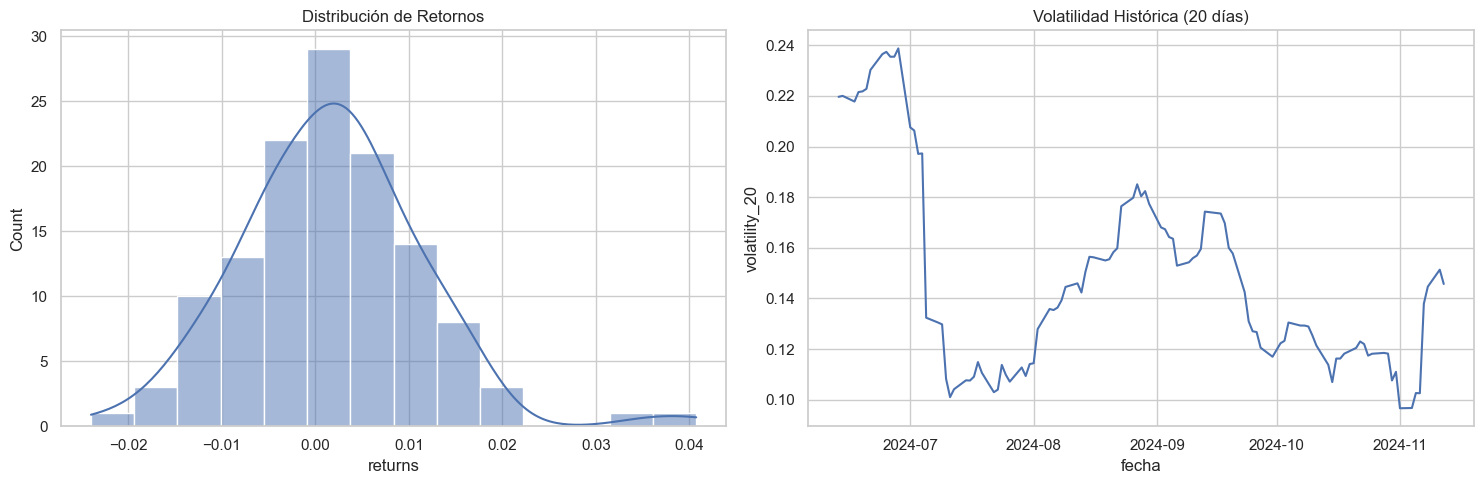

In [31]:
# 2. Características Estadísticas
print("\nCalculando características estadísticas...")
df_stats = fe.calculate_statistical_features(df_technical)

# Visualizar distribución de retornos y volatilidad
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=df_stats, x='returns', kde=True, ax=ax1)
ax1.set_title('Distribución de Retornos')
sns.lineplot(data=df_stats, x=df_stats.index, y='volatility_20', ax=ax2)
ax2.set_title('Volatilidad Histórica (20 días)')
plt.tight_layout()
plt.show()

In [33]:
# 3. Características de Sentimiento
try:
    print("\nProcesando características de sentimiento...")
    
    # Verificar si tenemos datos de noticias
    if 'news' not in data:
        print("No se encontraron datos de noticias para analizar")
    else:
        print("\nColumnas disponibles en los datos de noticias:")
        print(data['news'].columns.tolist())
        
        # Procesar características de sentimiento
        df_sentiment = fe.process_sentiment_features(data['news'])
        
        print("\nCaracterísticas de sentimiento generadas:")
        print(df_sentiment.columns.tolist())
        
        # Crear figura para visualización
        fig = go.Figure()
        
        # Añadir línea de sentimiento normalizado
        fig.add_trace(go.Scatter(
            x=df_sentiment.index,
            y=df_sentiment['sentiment_score_normalized'],
            mode='lines',
            name='Sentimiento Normalizado',
            line=dict(color='purple')
        ))
        
        # Configurar el layout
        fig.update_layout(
            title='Análisis de Sentimiento del Mercado',
            xaxis_title='Fecha',
            yaxis_title='Sentimiento Normalizado',
            template='plotly_white',
            showlegend=True,
            legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="left",
                x=0.01
            )
        )
        
        # Añadir líneas de referencia para sentimiento neutral
        fig.add_hline(y=0, line_dash="dash", line_color="gray", 
                     annotation_text="Neutral")
        
        fig.show()
        
        # Visualizar distribución del sentimiento
        fig2 = go.Figure()
        fig2.add_trace(go.Histogram(
            x=df_sentiment['sentiment_score_normalized'],
            nbinsx=30,
            name='Distribución del Sentimiento',
            marker_color='purple'
        ))
        
        fig2.update_layout(
            title='Distribución del Sentimiento Normalizado',
            xaxis_title='Valor del Sentimiento',
            yaxis_title='Frecuencia',
            template='plotly_white'
        )
        
        fig2.show()
        
        # Mostrar estadísticas básicas del sentimiento
        print("\nEstadísticas básicas del sentimiento:")
        stats_df = df_sentiment['sentiment_score_normalized'].describe()
        print(stats_df)
        
        # Análisis adicional del sentimiento
        print("\nAnálisis de sentimiento por categoría:")
        sentiment_counts = df_sentiment['sentiment_category'].value_counts()
        print(sentiment_counts)
        
        # Guardar características de sentimiento
        output_path = os.path.join(output_dir, f'sentiment_features_{end_date_str}.csv')
        df_sentiment.to_csv(output_path)
        print(f"\nCaracterísticas de sentimiento guardadas en: {output_path}")

except Exception as e:
    print(f"\nError en el procesamiento de sentimiento: {str(e)}")
    print("\nDetalles del error:")
    import traceback
    traceback.print_exc()


Procesando características de sentimiento...

Columnas disponibles en los datos de noticias:
['title', 'summary', 'source', 'link', 'sentiment_score']

Características de sentimiento generadas:
['title', 'summary', 'source', 'link', 'sentiment_score', 'sentiment_score_normalized', 'sentiment_category', 'extreme_sentiment']



Estadísticas básicas del sentimiento:
count    8.500000e+01
mean     5.812344e-17
std      1.005935e+00
min     -3.487667e+00
25%      1.463221e-01
50%      1.463221e-01
75%      1.463221e-01
max      4.606218e+00
Name: sentiment_score_normalized, dtype: float64

Análisis de sentimiento por categoría:
sentiment_category
neutral     85
negative     0
positive     0
Name: count, dtype: int64

Características de sentimiento guardadas en: /Users/mayel/repos/banco-base-proyecto-test/notebooks/data/processed/features/sentiment_features_2024-11-12.csv


In [34]:
# Guardar features procesados
try:
    print("\nGuardando características procesadas...")
    
    # Preparar diccionario con todos los datos relevantes
    features_data = {
        'technical_features': df_technical,
        'statistical_features': df_stats
    }
    
    if 'news' in data:
        features_data['sentiment_features'] = df_sentiment
    
    # Guardar los datos procesados en el mismo directorio que los datos originales
    output_dir = data_path
    
    # Guardar cada conjunto de características
    for name, feature_df in features_data.items():
        if isinstance(feature_df, pd.DataFrame):
            output_path = os.path.join(output_dir, f'{name}_{end_date_str}.csv')
            feature_df.to_csv(output_path, index=True)
            print(f"✓ {name} guardado exitosamente en {output_path}")
            print(f"  Columnas guardadas: {feature_df.columns.tolist()}")
            print(f"  Dimensiones: {feature_df.shape}")
        else:
            print(f"⚠ {name} no es un DataFrame y no se guardó")
    
    print(f"\nDatos guardados exitosamente en el directorio '{output_dir}'")
    
    # Mostrar resumen final de los archivos en el directorio
    print("\nArchivos disponibles en el directorio después del procesamiento:")
    for file in os.listdir(output_dir):
        if file.endswith(end_date_str + '.csv'):
            print(f"- {file}")

except Exception as e:
    print(f"\nError guardando los datos: {str(e)}")
    print("\nDetalles del error:")
    import traceback
    traceback.print_exc()


Guardando características procesadas...
✓ technical_features guardado exitosamente en /Users/mayel/repos/banco-base-proyecto-test/notebooks/data/processed/technical_features_2024-11-12.csv
  Columnas guardadas: ['usdmxn_fix', 'returns_usd_mxn', 'returns', 'sma_5', 'volatility_5', 'rsi_5', 'momentum_5', 'sma_10', 'volatility_10', 'rsi_10', 'momentum_10', 'sma_20', 'volatility_20', 'rsi_20', 'momentum_20']
  Dimensiones: (127, 15)
✓ statistical_features guardado exitosamente en /Users/mayel/repos/banco-base-proyecto-test/notebooks/data/processed/statistical_features_2024-11-12.csv
  Columnas guardadas: ['usdmxn_fix', 'returns_usd_mxn', 'returns', 'sma_5', 'volatility_5', 'rsi_5', 'momentum_5', 'sma_10', 'volatility_10', 'rsi_10', 'momentum_10', 'sma_20', 'volatility_20', 'rsi_20', 'momentum_20', 'mean_5', 'std_5', 'skew_5', 'kurt_5', 'mean_10', 'std_10', 'skew_10', 'kurt_10', 'mean_20', 'std_20', 'skew_20', 'kurt_20']
  Dimensiones: (127, 27)
✓ sentiment_features guardado exitosamente e